<a href="https://colab.research.google.com/github/seodaegal/Textmining/blob/main/%ED%85%8D%EC%8A%A4%ED%8A%B8_%EC%A0%84%EC%B2%98%EB%A6%AC%EC%99%80_%EC%9B%8C%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1주차. 텍스트 전처리와 워드
-----
텍스트 분석에서 가장 기초가 되는 작업 중 하나는 바로 주제(또는 핵심 단어)를 찾는 것입니다.<br>
그리고 주제를 찾기 위해서 가장 손쉽게 활용되는 방법 중 하나가 바로 **빈도 분석**입니다.<br>
<br>
워드 클라우드는 텍스트에 쓰인 단어를 빈도 분석 결과를 시각화 한 것입니다.<br>
이번 시간에는 텍스트 분석을 위해 텍스트 전처리를 하고 분석 후 워드 클라우드로 시각화하는 과정까지 진행해보겠습니다.<br>

**학습 목표**
1. 텍스트 전처리 후 단어 토큰화하기
2. 토큰화된 단어 카운트하기
3. 워드 클라우드 만들기

In [ ]:
# Konlpy 라이브러리 설치
! pip install konlpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 워드클라우드 생성을 위해 한글 폰트를 설치합니다.
# 설치 후 런타임을 다시 시작합니다.
# 상단 메뉴 '런타임' > '런타임 다시 시작'

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [ ]:
# Konlpy 라이브러리 불러오기
#코엔엘파이, 한국어 정보처리를 위한 패키지
from konlpy.tag import Okt
okt = Okt()

In [ ]:
okt.pos('챗GPT 쿠버네티스 분석')

[('챗', 'Noun'),
 ('GPT', 'Alpha'),
 ('쿠버', 'Noun'),
 ('네', 'Josa'),
 ('티스', 'Noun'),
 ('분석', 'Noun')]

In [ ]:
# 필요한 라이브러리 불러오기
import pandas as pd
import re
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# 구글 드라이브 불러오기
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# 파일 업로드
path = '/content/drive/MyDrive/딥다이브/1강/요즘IT_2023.04.27.csv'
df = pd.read_csv(path); df

# 위에 '구글 드라이브 불러오기' 코드를 실행했는데도 'drive' 폴더가 생성되지 않는다면 '폴더 새로고침' 아이콘을 클릭해주세요.
# 왼쪽 폴더 표시를 누르고 'drive' > 'MyDrive'로 이동하시면 본인의 구글 드라이브를 확인하실 수 있습니다.
# 제공해드린 파일을 구글 드라이브에 업로드한 뒤 Colab에서 찾아 마우스를 올려두시면 파일명 오른쪽에 작은 점 세 개가 나옵니다.
# '경로 복사'를 선택한 뒤 path 변수에 붙여 넣으시면 됩니다.

# https://starrykss.tistory.com/1029 위에 방법을 잘 모르시겠다면 이 링크를 참고해주세요.

,제목,작성자,날짜,조회수,분류,본문
0,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",프로덕트 세계,10시간 전,1.8K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...
1,﻿﻿ChatGPT로 쿠버네티스 관리하는 방법,테크유람,15시간 전,3.0K,개발,"최근 ChatGPT에 대한 관심이 뜨겁습니다. ChatGPT는 단순 개발부터 보안,..."
2,프롬프트 한 줄로 다섯 가지 컬러 만드는 ‘AI Colors’,지금 써보러 갑니다,1일 전,2.7K,디자인,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요. 특히...
3,데이터 주도 프로덕트 개발을 위한 실험 환경 세팅하기,요즘IT의 번역글들,1일 전,2.4K,개발,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다. 필자인 빅터 세민(Vict...
4,클라우드 비용 최적화: 수백만 달러 절약한 쿠팡의 노력,쿠팡 엔지니어링,2일 전,7.0K,개발,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...
...,...,...,...,...,...,...
1464,카드로 쌓은 집,매거진 입맛,2021.03.05.,1.4K,디자인,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...
1465,일자리 산업이 휴먼 클라우드(human cloud)에 적응하는 방법,요즘IT의 번역글들,2021.03.04.,1.8K,기획,"우버(Uber)앱이 출시되면서,사람들은 한 번의 터치만으로도 차량을 호출할 수 있는..."
1466,마약보다 달콤한 SNS의 유혹,기획자 연주리,2021.03.04.,1.8K,기획,"""왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까? 내가 의지박..."
1467,온라인 마케팅 동영상 만들기 2편: 온라인 플랫폼의 빅데이터를 이용하라.,익명의 삼엽충,2021.03.03.,1.6K,기획,이전 편인 ‘온라인 마케팅 동영상 만들기 1편: 5초 안에 사로잡아라.’부터 읽으면...


In [ ]:
# 데이터 정보 확인하기 .info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1469 entries, 0 to 1468
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      1469 non-null   object
 1   작성자     1469 non-null   object
 2   날짜      1469 non-null   object
 3   조회수     1469 non-null   object
 4   분류      1468 non-null   object
 5   본문      1469 non-null   object
dtypes: object(6)
memory usage: 69.0+ KB


In [ ]:
#숫자 데이터
df.describe()

,제목,작성자,날짜,조회수,분류,본문
count,1469,1469,1469,1469,1468,1469
unique,1469,133,526,254,7,1469
top,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",요즘IT의 번역글들,인기,3.5K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...
freq,1,203,69,37,456,1


In [ ]:
# 데이터 결측값 개수 확인하기 .isnull().sum()
df.isnull().sum()
# 컬럼별로 검색해보고 싶은 경우 df['컬럼명'].isnull().sum()

제목     0
작성자    0
날짜     0
조회수    0
분류     1
본문     0
dtype: int64

In [ ]:
# 결측 데이터 확인
df[df['분류'].isnull()]

,제목,작성자,날짜,조회수,분류,본문
101,"요즘IT 콘텐츠, 이제 '스크랩'하세요!",요즘IT,2023.02.08.,2.5K,NaN,"안녕하세요, 요즘IT입니다. 오늘은 요즘IT 업데이트 소식을 전하러 왔는데요. 바로..."


In [ ]:
# 결측치 제거
df.dropna(inplace=True) #inplace는 대치한다 (df출력하면 하나가 없어짐)

In [ ]:
df.reset_index(drop=True, inplace=True)

In [ ]:
df #1468 rows

,제목,작성자,날짜,조회수,분류,본문
0,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",프로덕트 세계,10시간 전,1.8K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...
1,﻿﻿ChatGPT로 쿠버네티스 관리하는 방법,테크유람,15시간 전,3.0K,개발,"최근 ChatGPT에 대한 관심이 뜨겁습니다. ChatGPT는 단순 개발부터 보안,..."
2,프롬프트 한 줄로 다섯 가지 컬러 만드는 ‘AI Colors’,지금 써보러 갑니다,1일 전,2.7K,디자인,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요. 특히...
3,데이터 주도 프로덕트 개발을 위한 실험 환경 세팅하기,요즘IT의 번역글들,1일 전,2.4K,개발,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다. 필자인 빅터 세민(Vict...
4,클라우드 비용 최적화: 수백만 달러 절약한 쿠팡의 노력,쿠팡 엔지니어링,2일 전,7.0K,개발,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...
...,...,...,...,...,...,...
1463,카드로 쌓은 집,매거진 입맛,2021.03.05.,1.4K,디자인,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...
1464,일자리 산업이 휴먼 클라우드(human cloud)에 적응하는 방법,요즘IT의 번역글들,2021.03.04.,1.8K,기획,"우버(Uber)앱이 출시되면서,사람들은 한 번의 터치만으로도 차량을 호출할 수 있는..."
1465,마약보다 달콤한 SNS의 유혹,기획자 연주리,2021.03.04.,1.8K,기획,"""왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까? 내가 의지박..."
1466,온라인 마케팅 동영상 만들기 2편: 온라인 플랫폼의 빅데이터를 이용하라.,익명의 삼엽충,2021.03.03.,1.6K,기획,이전 편인 ‘온라인 마케팅 동영상 만들기 1편: 5초 안에 사로잡아라.’부터 읽으면...


In [ ]:
# Text Cleaning 연습
text = df['본문'][0]

# re는 정규표현식 라이브러리
# 정규표현식을 더 깊이 있게 알고 싶으신 분은 https://wikidocs.net/1669를 참고해주세요.

#텍스트 클리닝
#re.sub（정규 표현식, 치환 문자, 대상 문자열）
re.sub("이성배", '장영준', '다이브 리더 이성배') #패턴 만들기 가능
re.sub('[텍마]', '쏙', '2023 이해 쏙쏙 텍스트마이닝') #대괄호로 '[\s\d]'  => 2023 이해 쏙쏙 쏙스트쏙이닝

cleaned_text = re.sub('[^\s\w]', ' ', text) # \w는 alphanumeric \s는 공백입니다. ^는 not을 의미합니다. \d 는 integer

print('클리닝 전', text, '\n',
      '클리닝 후', cleaned_text, sep = '\n')

In [ ]:
# Text Cleaning
content_list = []

for text in df['본문']:
  cleaned_text= re.sub('[^\d\w]',' ', text)
  content_list.append(cleaned_text)

In [ ]:
len(content_list)

1468

In [ ]:
# Cleaning 결과 저장하기
df['본문_전처리']= content_list

## 텍스트 토큰화

In [ ]:
# Okt 활용하기 (1); 토큰화하기
text = df['본문_전처리'][0]
okt.morphs(text)

In [ ]:
# Okt 활용하기 (2) 품사 태깅하기
pos_word_list = okt.pos(text, stem=True) # pos는 단어와 품사를 모두 보여줍니다.
print(pos_word_list)

[('프세', 'Noun'), ('커뮤니티', 'Noun'), ('리포트', 'Noun'), ('1', 'Number'), ('요즘', 'Noun'), ('핫', 'Noun'), ('한', 'Josa'), ('기업', 'Noun'), ('은', 'Josa'), ('왜', 'Noun'), ('커뮤니티', 'Noun'), ('에', 'Josa'), ('집중', 'Noun'), ('하다', 'Verb'), ('지금', 'Noun'), ('으로부터', 'Josa'), ('10년', 'Number'), ('전인', 'Noun'), ('2013년', 'Number'), ('아마존', 'Noun'), ('은', 'Josa'), ('도서', 'Noun'), ('추천', 'Noun'), ('소셜', 'Noun'), ('네트워크', 'Noun'), ('인', 'Josa'), ('굿리즈', 'Noun'), ('Goodreads', 'Alpha'), ('를', 'Noun'), ('1억', 'Number'), ('5천만', 'Number'), ('달러', 'Noun'), ('에', 'Josa'), ('인수', 'Noun'), ('하다', 'Verb'), ('이뿌다', 'Adjective'), ('아니다', 'Adjective'), ('아마존', 'Noun'), ('은', 'Josa'), ('당시', 'Noun'), ('에', 'Josa'), ('이미', 'Adverb'), ('책', 'Noun'), ('을', 'Josa'), ('사랑', 'Noun'), ('하다', 'Verb'), ('이', 'Noun'), ('들', 'Suffix'), ('을', 'Josa'), ('위', 'Noun'), ('한', 'Josa'), ('커뮤니티', 'Noun'), ('기반', 'Noun'), ('백과사전', 'Noun'), ('community', 'Alpha'), ('powered', 'Alpha'), ('encyclopedia', 'Alpha'), ('for', 'Alpha'), ('book',

In [ ]:
# 품사로 필터링 하기
pos_list = ['Noun', 'Verb', 'Adjective'] # 원하는 품사를 선택합니다.
pos_filtered_word_list = []

for word, pos in pos_word_list: # 포스 태깅한 결과 (단어, 품사) 쌍이 나옵니다.
    if pos in pos_list: # 이 중에 품사가 pos_list에 있으면
        pos_filtered_word_list.append(word) # pos_filtered_word_list에 추가합니다.

print(pos_filtered_word_list)

['프세', '커뮤니티', '리포트', '요즘', '핫', '기업', '왜', '커뮤니티', '집중', '하다', '지금', '전인', '아마존', '도서', '추천', '소셜', '네트워크', '굿리즈', '를', '달러', '인수', '하다', '이뿌다', '아니다', '아마존', '당시', '책', '사랑', '하다', '이', '위', '커뮤니티', '기반', '백과사전', '표방', '하다', '셸퍼리', '도서', '특화', '소셜', '및', '정보', '네트워크', '사이트', '보유', '있다', '이커머스', '업', '메인', '하다', '있다', '아마존', '왜', '책', '판매', '하다', '경쟁', '사가', '아니다', '커뮤니티', '당시', '어마어마하다', '금액', '인수', '하다', '그로', '후', '네이버', '미국', '판', '당근', '불리다', '포', '마크', '달러', '인수', '하다', '포', '마크', '커뮤니티', '서비스', '결합', '되다', '미국', '대표', '중고', '플랫폼', '요', '네이버', '사업', '올해', '키우다', '들다', '커뮤니티', '커머스', '이다', '포', '마크', '기적', '쇼핑', '렌즈', '라이브', '커머스', '등', '네이버', '기술', '활용', '하다', '서비스', '강화하다', '중장', '기적', '주요', '기능', '특성', '맞다', '광고', '시너지', '창', '추다', '등', '더욱', '의미', '있다', '성과', '낼', '수', '있다', '핵심', '기술', '산업', '연결하다', '독보', '위', '개인', '거래', '플랫폼', '성장', '시키다', '비다', '비치', '기도', '하다', '전', '아마존', '인수', '닮다', '않다', '커뮤니티', '미래', '내다보다', '과감', '인수', '결정', '기업', '행보', '그', '이유', '궁금하다', '않다', '기업'

In [ ]:
# Okt 활용하기 (3) 명사 태깅하기
okt.nouns(text)

In [ ]:
# 리스트 컴프리헨션으로 품사 필터링 구현하기
[word for word, pos in pos_word_list if pos in pos_list]

In [ ]:
# 품사 필터링
def pos_filtering(word_list):
    pos_list = ['Noun', 'Alpha']
    pos_filtered_word_list = [word[0] for word in word_list if word[1] in pos_list]

    return pos_filtered_word_list

In [ ]:
# 스테밍 + 품사 태그하기
df['본문_POS'] = df['본문_전처리'].map(lambda x : okt.pos(x, stem=True))

In [ ]:
# 품사 필터 적용하기
df['본문_단어'] = df['본문_POS'].map(pos_filtering)

In [ ]:
 df['본문_POS'].map(pos_filtering)

0       [프세, 커뮤니티, 리포트, 요즘, 핫, 기업, 왜, 커뮤니티, 집중, 지금, 전인...
1       [최근, ChatGPT, 대한, 관심, ChatGPT, 단순, 개발, 보안, 업무,...
2       [챗, GPT, 의, 등장, 서비스, 업무, 과정, 영향, 끼, AI, 명령, 품질...
3       [본문, deepL, 활용, 해외, 번역, 콘텐츠, 필자, 빅터, 세민, Victo...
4       [국내, IT, 기업, 한국, 세계, 무대, 정도, 기술, 아이디어, 자랑, 이, ...
                              ...                        
1463    [아웃소싱, 클라이언트, 측, 시안, 카드, 원인, 불명, 현상, 경험, 수, 여기...
1464    [우버, Uber, 앱, 출시, 사람, 번의, 터치, 차량, 호출, 수, 능력, 그...
1465    [왜, 유튜브, 번, 보기, 시작, 시간, 계속, 내, 의지, 박약, 것, 이, 시...
1466    [이전, 편, 온라인, 마케팅, 동영상, 만들기, 편, 안, 부터, 더, 검색, 하...
1467    [우리, 인간, 곳, 집중, 수, 시간, 얼마나, 생각, 적, 인간, 집중, 시간,...
Name: 본문_POS, Length: 1468, dtype: object

In [ ]:
# 워드 리스트 병합하기
word_list = sum(df['본문_단어'], [])

In [ ]:
word_list

In [ ]:
# 단어 리스트 생성
print('총 {}개의 단어'.format(len(word_list)))

총 1261028개의 단어


## 빈도분석
----
워드 클라우드를 생성하고 이미지를 저장합니다.</br>
워드 클라우드 라이브러리만 있으면 간단하게 만들어 볼 수 있습니다. </br>
다양한 컬러와 마스크 이미지를 활용하고 싶다면</br>
https://blog.naver.com/vi_football/221775297963를 참고해주세요.

In [ ]:
# 빈도분석
c= Counter(word_list)

In [ ]:
c

In [ ]:
c.most_common(100)

In [ ]:
# 불용어
stopwords = ['수', '것', '이', '때', '등', '더', '를', '그', '위', '경우', '통해', '위해', '일', '다른', '가지', '대한', '의', '대해', '중', '내', '때문']

In [ ]:
# 불용어 제거 후 빈도분석
[word for word in word_list if word not in stopwords]
c= Counter(word_list)

c.most_common(100)

### 워드 클라우드 만들기

In [ ]:
!pip install wordcloud
from wordcloud import WordCloud # 워드 클라우드 라이브러리 설치
word_dict = dict(c.most_common(100)) # 딕셔너리 형태로 변환

# 워드클라우드 설정하기
wc = WordCloud(font_path = 'NanumGothic.ttf',
               background_color= 'white',
               width = 3000, height = 2000,
               min_font_size = 10) #setting

cloud = wc.generate_from_frequencies(word_dict) # 딕셔너리 형태로 저장되어 있어야 합니다.

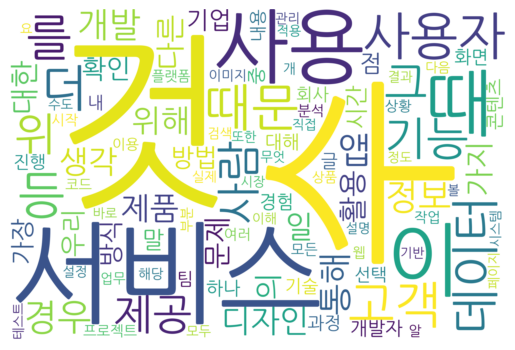

In [ ]:
# 워드 클라우드 출력하기
plt.imshow(cloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('요즘IT 콘텐츠 워드 클라우드.png', bbox_inches='tight', dpi = 300)

# 경로를 지정하여 구글 드라이브에 저장할 수도 있습니다.
# plt.savefig('/content/drive/MyDrive/wordcloud.png')
plt.show()

# 1주차 과제
토픽별 | 날짜별 워드 클라우드 만들기
---
1주차 과제는 위의 코드를 활용하여 **토픽별 또는 날짜별 워드클라우드**를 만드는 것입니다.<br>
여러분들이 분석 목표를 설정한 후에 둘 중 하나를 선택하셔도 되고, 둘을 적절히 합쳐도 됩니다.<br>
<br>
만약 오늘 수업을 따라오기 어려우셨다면 **배포용으로 제공드린 완성된 코드를 실행**하시고 제출 부탁드립니다.<br>
과제는 선택이 아닌 필수입니다. 다만, 개인 사정으로 앞으로 쭉 과제 제출이 어려운 경우 꼭! 말씀 부탁드립니다.<br>
<br>
우수 과제를 제출해주신 한 분을 선정하여 작은 상품을 드리도록 하겠습니다.



> 분석 목표: 년도별 개발 워드 클라우드 비교 (year.month.date 형태로 표기된 데이터 중에서)



In [ ]:
df

,제목,작성자,날짜,조회수,분류,본문,본문_전처리,본문_POS,본문_단어
0,"아마존, 네이버, 스타벅스..공룡 기업이 '커뮤니티' 하는 이유",프로덕트 세계,10시간 전,1.8K,기획,[프세 커뮤니티 리포트 #1] 요즘 핫한 기업은 왜 ‘커뮤니티’에 집중할까?\n\n...,프세 커뮤니티 리포트 1 요즘 핫한 기업은 왜 커뮤니티 에 집중할까 지금...,"[(프세, Noun), (커뮤니티, Noun), (리포트, Noun), (1, Nu...","[프세, 커뮤니티, 리포트, 요즘, 핫, 기업, 왜, 커뮤니티, 집중, 지금, 전인..."
1,﻿﻿ChatGPT로 쿠버네티스 관리하는 방법,테크유람,15시간 전,3.0K,개발,"최근 ChatGPT에 대한 관심이 뜨겁습니다. ChatGPT는 단순 개발부터 보안,...",최근 ChatGPT에 대한 관심이 뜨겁습니다 ChatGPT는 단순 개발부터 보안 ...,"[(최근, Noun), (ChatGPT, Alpha), (에, Josa), (대한,...","[최근, ChatGPT, 대한, 관심, ChatGPT, 단순, 개발, 보안, 업무,..."
2,프롬프트 한 줄로 다섯 가지 컬러 만드는 ‘AI Colors’,지금 써보러 갑니다,1일 전,2.7K,디자인,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요. 특히...,챗GPT의 등장으로 서비스는 물론 업무 과정에도 많은 영향을 끼치고 있는데요 특히...,"[(챗, Noun), (GPT, Alpha), (의, Noun), (등장, Noun...","[챗, GPT, 의, 등장, 서비스, 업무, 과정, 영향, 끼, AI, 명령, 품질..."
3,데이터 주도 프로덕트 개발을 위한 실험 환경 세팅하기,요즘IT의 번역글들,1일 전,2.4K,개발,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다. 필자인 빅터 세민(Vict...,본문은 deepL을 활용해 만든 해외 번역 콘텐츠입니다 필자인 빅터 세민 Vict...,"[(본문, Noun), (은, Josa), (deepL, Alpha), (을, Jo...","[본문, deepL, 활용, 해외, 번역, 콘텐츠, 필자, 빅터, 세민, Victo..."
4,클라우드 비용 최적화: 수백만 달러 절약한 쿠팡의 노력,쿠팡 엔지니어링,2일 전,7.0K,개발,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...,국내 IT기업은 한국을 넘어 세계를 무대로 할 정도로 뛰어난 기술과 아이디어를 자랑...,"[(국내, Noun), (IT, Alpha), (기업, Noun), (은, Josa...","[국내, IT, 기업, 한국, 세계, 무대, 정도, 기술, 아이디어, 자랑, 이, ..."
...,...,...,...,...,...,...,...,...,...
1463,카드로 쌓은 집,매거진 입맛,2021.03.05.,1.4K,디자인,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...,아웃소싱을 하다 보면 클라이언트 측이 보내주는 시안에서는 유난히 카드가 많이 보이는...,"[(아웃소싱, Noun), (을, Josa), (하다, Verb), (보다, Ver...","[아웃소싱, 클라이언트, 측, 시안, 카드, 원인, 불명, 현상, 경험, 수, 여기..."
1464,일자리 산업이 휴먼 클라우드(human cloud)에 적응하는 방법,요즘IT의 번역글들,2021.03.04.,1.8K,기획,"우버(Uber)앱이 출시되면서,사람들은 한 번의 터치만으로도 차량을 호출할 수 있는...",우버 Uber 앱이 출시되면서 사람들은 한 번의 터치만으로도 차량을 호출할 수 있는...,"[(우버, Noun), (Uber, Alpha), (앱, Noun), (이, Jos...","[우버, Uber, 앱, 출시, 사람, 번의, 터치, 차량, 호출, 수, 능력, 그..."
1465,마약보다 달콤한 SNS의 유혹,기획자 연주리,2021.03.04.,1.8K,기획,"""왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까? 내가 의지박...",왜 유튜브를 한 번 보기 시작하면 한 시간이 넘도록 계속 보게 될까 내가 의지박...,"[(왜, Noun), (유튜브, Noun), (를, Josa), (하다, Verb)...","[왜, 유튜브, 번, 보기, 시작, 시간, 계속, 내, 의지, 박약, 것, 이, 시..."
1466,온라인 마케팅 동영상 만들기 2편: 온라인 플랫폼의 빅데이터를 이용하라.,익명의 삼엽충,2021.03.03.,1.6K,기획,이전 편인 ‘온라인 마케팅 동영상 만들기 1편: 5초 안에 사로잡아라.’부터 읽으면...,이전 편인 온라인 마케팅 동영상 만들기 1편 5초 안에 사로잡아라 부터 읽으면...,"[(이전, Noun), (편, Noun), (인, Josa), (온라인, Noun)...","[이전, 편, 온라인, 마케팅, 동영상, 만들기, 편, 안, 부터, 더, 검색, 하..."


In [ ]:
def extract_year(date_str):
    if '전' in date_str:
        if '시간' in date_str:
            return pd.Timestamp.now().year
        elif '일' in date_str:
            days_ago = int(date_str.split('일')[0])
            past_date = pd.Timestamp.now() - pd.DateOffset(days=days_ago)
            return past_date.year
    elif '.' in date_str:
        return pd.to_datetime(date_str.rstrip('.'), format='%Y.%m.%d').year
    else:
        return None

df['year'] = df['날짜'].apply(extract_year)
df['year'] = df['year'].fillna(method='ffill') # for 인기
df["year"] = df["year"].astype(int)

In [ ]:
#year_df = df.groupby('year')['본문_단어'].sum().reset_index(); year_df

year_df= df.groupby(['year', '분류'])['본문_단어'].sum().reset_index(); year_df

,year,분류,본문_단어
0,2021,개발,"[저, 개발자, IT, 기업, 이상, 근무, 개발, 업, 포지션, AWS, Cert..."
1,2021,기획,"[구글, 검색어, 결산, 것, 사람, 것, 가장, 해, 정리, 수, 말, 래서, 연..."
2,2021,디자인,"[본문, 위시켓, 번역가, 앰버, Amber, 해외, 콘텐츠, 기반, 번역, 문, ..."
3,2021,비즈니스,"[부, 알리바바, 부, 에어비앤비, 부, 텐센트, 기업, 가장, 이해, 방법, 재무..."
4,2021,아웃소싱,"[비, 정규, 직원, 협업, 때, 발생, 미스, 커뮤니케이션, 사례, 종종, 원격,..."
5,2021,프로덕트,"[프로, 덕트, 트렌드, 리포트, 걸음, 더, 법, 로톡, 프로, 덕트, 트렌드, ..."
6,2021,프리랜싱,"[이번, 편, 일반, 프리랜서, 수, 개, 에피소드, 관련, 꿀팁, 정리, 글, 프..."
7,2022,개발,"[해외여행, 가면, 종종, 전압, 달라, 어댑터, 구비, 곤, V, 콘센트, V, ..."
8,2022,기획,"[평소, 사이드, 프로젝트, 구상, 아이디어, 중, 하나, 특정, 회사, 재직, 재..."
9,2022,디자인,"[디자인, 시스템, 디자인, 원칙, 규격, 재사용, 수, UI, 패턴, 컴포넌트, ..."


In [ ]:
# 데이터프레임에 불용어 제거하기
year_df['본문_단어'] = year_df['본문_단어'].map(lambda x: [word for word in x if word not in stopwords])

In [ ]:
year_df['year_topic'] = year_df['year'].astype(str) + ' ' + year_df['분류'].astype(str)

In [ ]:
plt.rcParams['font.family'] = 'NanumGothic'

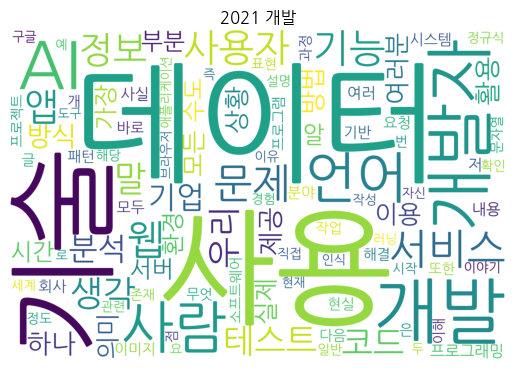

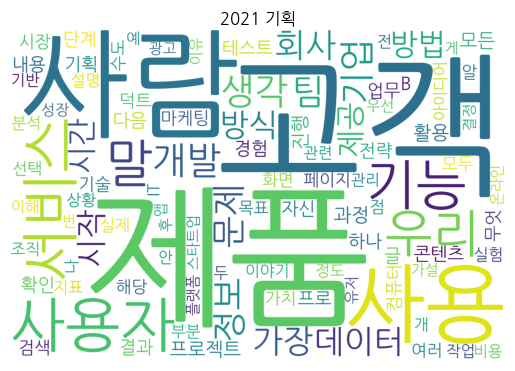

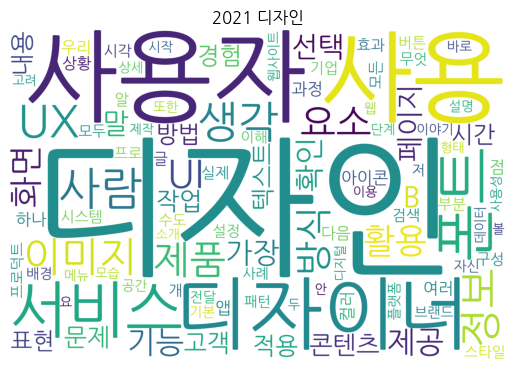

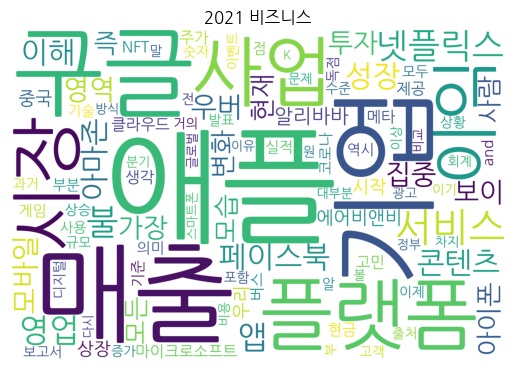

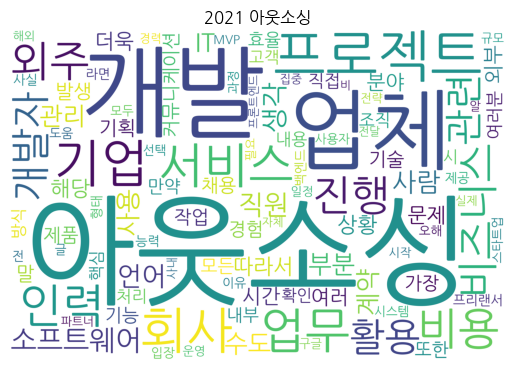

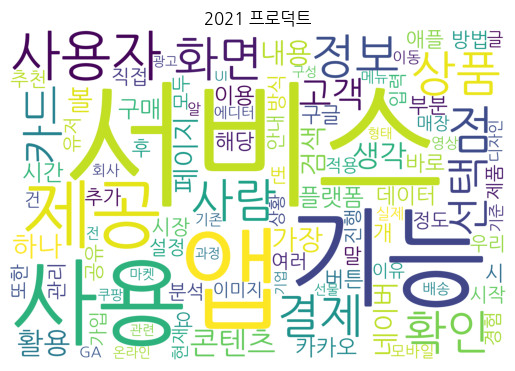

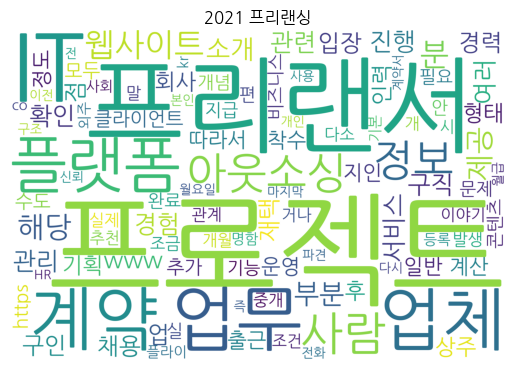

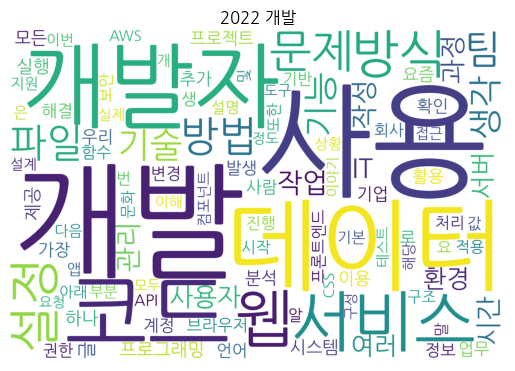

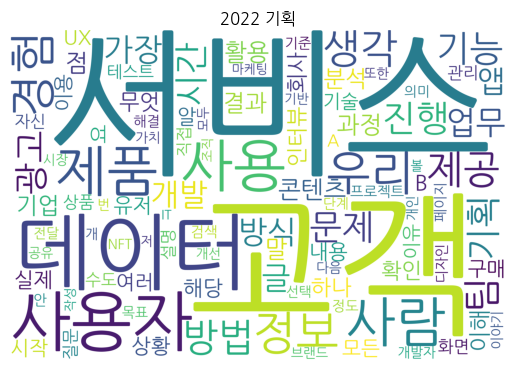

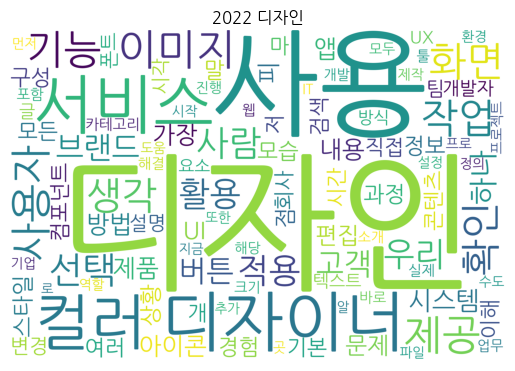

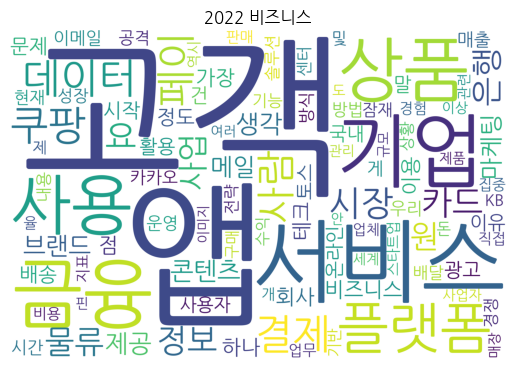

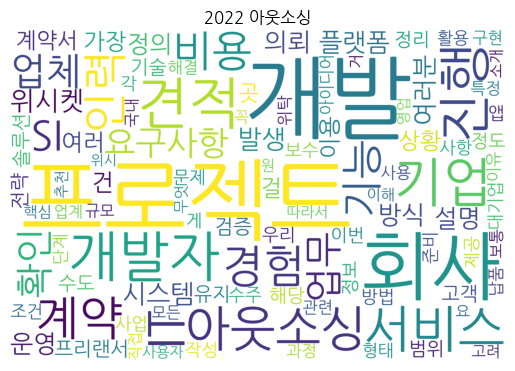

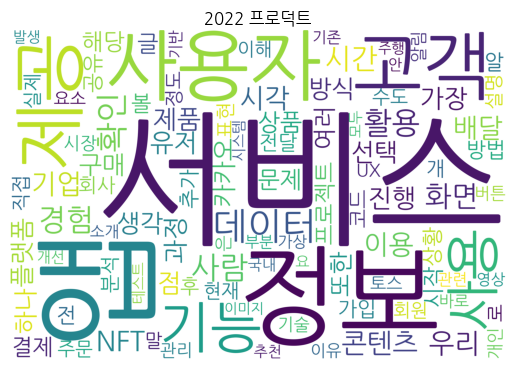

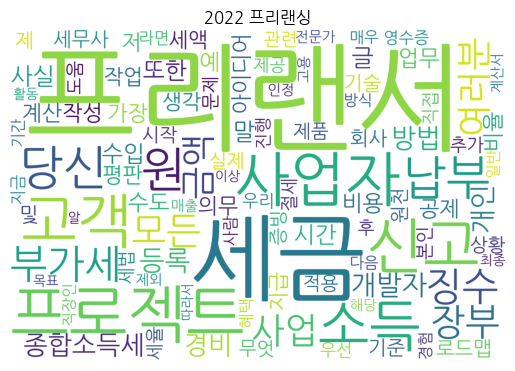

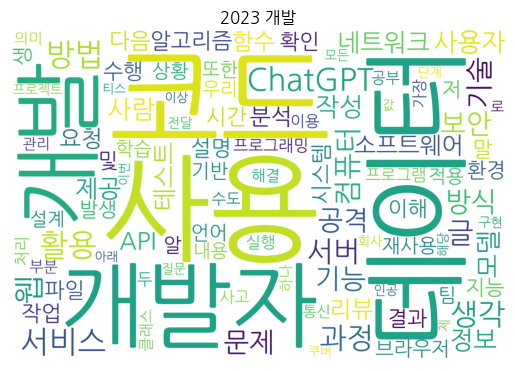

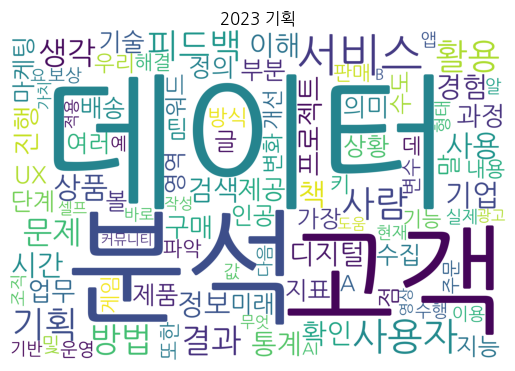

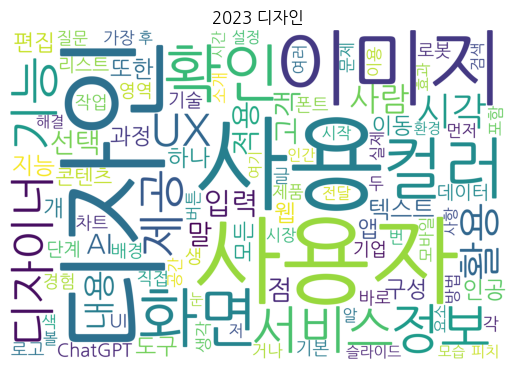

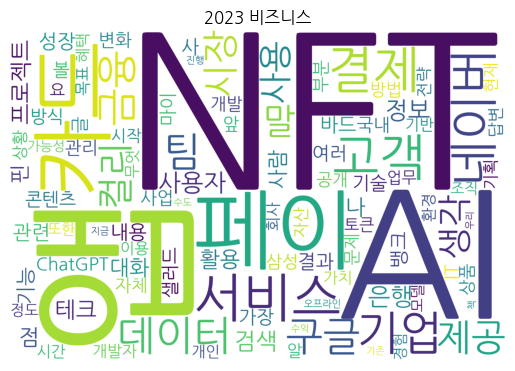

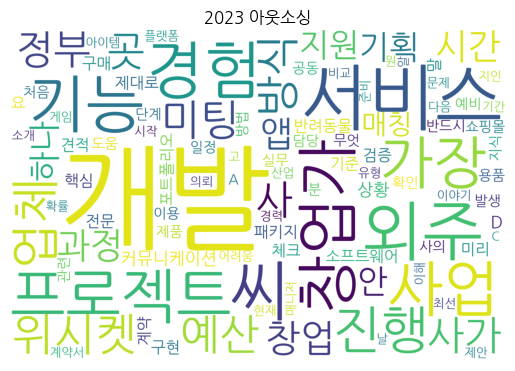

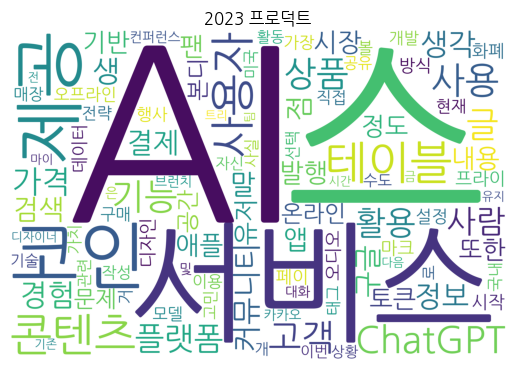

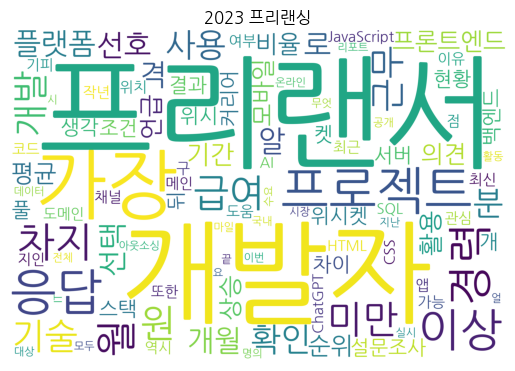

In [ ]:
num = 100
for year_topic, word_list in zip(year_df['year_topic'], year_df['본문_단어']):
    c = Counter(word_list)
    word_dict = dict(c.most_common(num))

    # 워드클라우드 설정하기
    wc = WordCloud(font_path = 'NanumGothic.ttf',
                background_color= 'white',
                width = 3000, height = 2000,
                min_font_size = 10)

    cloud = wc.generate_from_frequencies(word_dict)
    plt.imshow(cloud)
    plt.axis("off")
    plt.title(year_topic)
    plt.show()